In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
file_path = r'C:\work\Book1.xlsx'
df_patent = pd.read_excel(file_path)

In [345]:
pd.set_option('display.max_rows', 231)
pd.set_option('display.max_columns', 231)

In [346]:
df_patent.rename(columns={df_patent.columns[0]: 'Country'}, inplace=True)
df_patent.drop(df_patent.columns[[1, 2, 3]], axis=1, inplace=True)
indices_to_drop = [0, 1, 2, 3, 11, 36, 37, 39, 41, 43, 45, 47, 48, 59, 60, 61, 67, 94, 109, 120, 123, 129, 145, 155, 156, 175, 181, 183, 184]
df_patent.drop(indices_to_drop, inplace=True)

rows_to_change = [23, 80, 93, 116, 121, 136, 162, 168, 179]
column_to_change = 'Country'
new_names = ['Bolivia', 'Iran', 'Lao Peoples Democratic Republic', 'Netherlands', 'Macedonia', 'Moldova', 'Syria', 'Turkey', 'Venezuela']

for i, row_index in enumerate(rows_to_change):
    if row_index < 187:
        df_patent.at[row_index, column_to_change] = new_names[i]

df_patent = df_patent.sort_values(by='Country')

df_patent.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,8.0,5.0,5.0,9.0,21.0,34.0,62.0,120.0,238.0,391.0,416.0,386.0,426.0,366.0,378.0,361.0,341.0,11.0,NaN,4.0,13.0,19.0,25.0,24.0,18.0,5.0,12.0,24.0,21.0
5,Algeria,354.0,354.0,334.0,308.0,375.0,258.0,235.0,180.0,206.0,204.0,235.0,176.0,174.0,146.0,145.0,162.0,200.0,241.0,309.0,284.0,159.0,145.0,334.0,326.0,392.0,524.0,669.0,849.0,NaN,NaN,806.0,897.0,900.0,840.0,813.0,805.0,672.0,743.0,673.0,638.0,710.0,849.0,1118.0
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11.0,15.0,8.0,11.0,8.0
7,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,110.0,85.0,86.0,80.0
8,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,7.0,15.0,10.0,12.0,8.0,10.0,NaN,3.0,8.0,6.0


In [347]:
filtered_rows = df_patent[df_patent['Country'].str.contains('North Macedonia')]
filtered_rows

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022


In [348]:
GDP_path = r'C:\work\imf-dm-export-20231128.xls'
df_GDP = pd.read_excel(GDP_path)

In [349]:
df_GDP.rename(columns={df_GDP.columns[0]: 'Country'}, inplace=True)
indices_to_drop = [0, 1, 9, 20, 32, 34, 35, 39, 40, 41, 46, 54, 55, 62, 70, 71, 75, 92, 103, 107, 110, 111, 114, 120, 122, 127, 133, 141, 152, 161, 162, 166, 170, 171, 173, 175, 176, 190, 193, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230]
df_GDP.drop(indices_to_drop, inplace=True)
df_GDP = df_GDP.iloc[:, :-6]

rows_to_change = [13, 37, 63, 91, 94, 95, 129, 157, 182, 187, 192]
column_to_change = 'Country'
new_names = ['Bahamas', 'China', 'Gambia', 'Republic of Korea', 'Kyrgyzstan', 'Lao Peoples Democratic Republic', 'Macedonia', 'Slovakia', 'Turkey', 'United States of America', 'Viet Nam']

for i, row_index in enumerate(rows_to_change):
    if row_index < 200:
        df_GDP.at[row_index, column_to_change] = new_names[i]

df_GDP = df_GDP.sort_values(by='Country')

df_GDP.shape

(158, 44)

In [350]:
df_combined = pd.merge(df_patent, df_GDP, on='Country', how='inner', suffixes=('_patent', '_GDP'))
df_combined.set_index('Country', inplace=True)

df_combined.head()

,1980_patent,1981_patent,1982_patent,1983_patent,1984_patent,1985_patent,1986_patent,1987_patent,1988_patent,1989_patent,1990_patent,1991_patent,1992_patent,1993_patent,1994_patent,1995_patent,1996_patent,1997_patent,1998_patent,1999_patent,2000_patent,2001_patent,2002_patent,2003_patent,2004_patent,2005_patent,2006_patent,2007_patent,2008_patent,2009_patent,2010_patent,2011_patent,2012_patent,2013_patent,2014_patent,2015_patent,2016_patent,2017_patent,2018_patent,2019_patent,2020_patent,2021_patent,2022_patent,1980_GDP,1981_GDP,1982_GDP,1983_GDP,1984_GDP,1985_GDP,1986_GDP,1987_GDP,1988_GDP,1989_GDP,1990_GDP,1991_GDP,1992_GDP,1993_GDP,1994_GDP,1995_GDP,1996_GDP,1997_GDP,1998_GDP,1999_GDP,2000_GDP,2001_GDP,2002_GDP,2003_GDP,2004_GDP,2005_GDP,2006_GDP,2007_GDP,2008_GDP,2009_GDP,2010_GDP,2011_GDP,2012_GDP,2013_GDP,2014_GDP,2015_GDP,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2021_GDP,2022_GDP
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,8.0,5.0,5.0,9.0,21.0,34.0,62.0,120.0,238.0,391.0,416.0,386.0,426.0,366.0,378.0,361.0,341.0,11.0,NaN,4.0,13.0,19.0,25.0,24.0,18.0,5.0,12.0,24.0,21.0,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,9.8,-10,-28,-7.2,9.6,9.4,8.9,9.1,-10.9,8.8,12.9,6.9,8.3,4.5,5.5,5.5,5.5,5.9,6,7.5,3.4,3.7,2.5,1.4,1,1.8,2.2,3.3,3.8,4,2.1,-3.3,8.9,4.8
Algeria,354.0,354.0,334.0,308.0,375.0,258.0,235.0,180.0,206.0,204.0,235.0,176.0,174.0,146.0,145.0,162.0,200.0,241.0,309.0,284.0,159.0,145.0,334.0,326.0,392.0,524.0,669.0,849.0,NaN,NaN,806.0,897.0,900.0,840.0,813.0,805.0,672.0,743.0,673.0,638.0,710.0,849.0,1118.0,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,0.8,-1.2,1.6,-2.1,-0.9,3.8,3.8,1.1,5.1,3.2,3.8,3,5.6,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,2.9,3.4,2.8,3.8,3.7,3.2,1.4,1.2,1,-5.1,3.4,3.2
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,11.0,15.0,8.0,11.0,8.0,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,8.1,4.5,8.7,8.1,5.4,4.8,1.6,-5.6,-5.3,-2,0,-5,-3.5,2.5,1.4,3.7,0.3,1.6,2,-11.2,8.3,8.8
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,110.0,85.0,86.0,80.0,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,0,-3.5,12.1,11.4,11,10.5,10.4,11.2,7.3,4.7,2.2,3.1,4.2,13.7,3,11,15,11.5,14,11.2,0.9,4.9,3.5,8.5,5,4.8,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.2,3
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,7.0,15.0,10.0,12.0,8.0,10.0,NaN,3.0,8.0,6.0,8.2,3.8,-0.1,5.4,10.2,7.6,11.5,6.6,5.2,5.3,3,2.2,1.2,5.3,6.7,-4.4,6.6,5.5,4.7,3.7,6.2,-4.5,1,6.1,5.8,6.5,12.7,9.3,0,-12,-7.8,-2,3.4,-0.6,3.8,3.8,5.5,3.1,6.8,4.3,-17.5,6.6,8.5


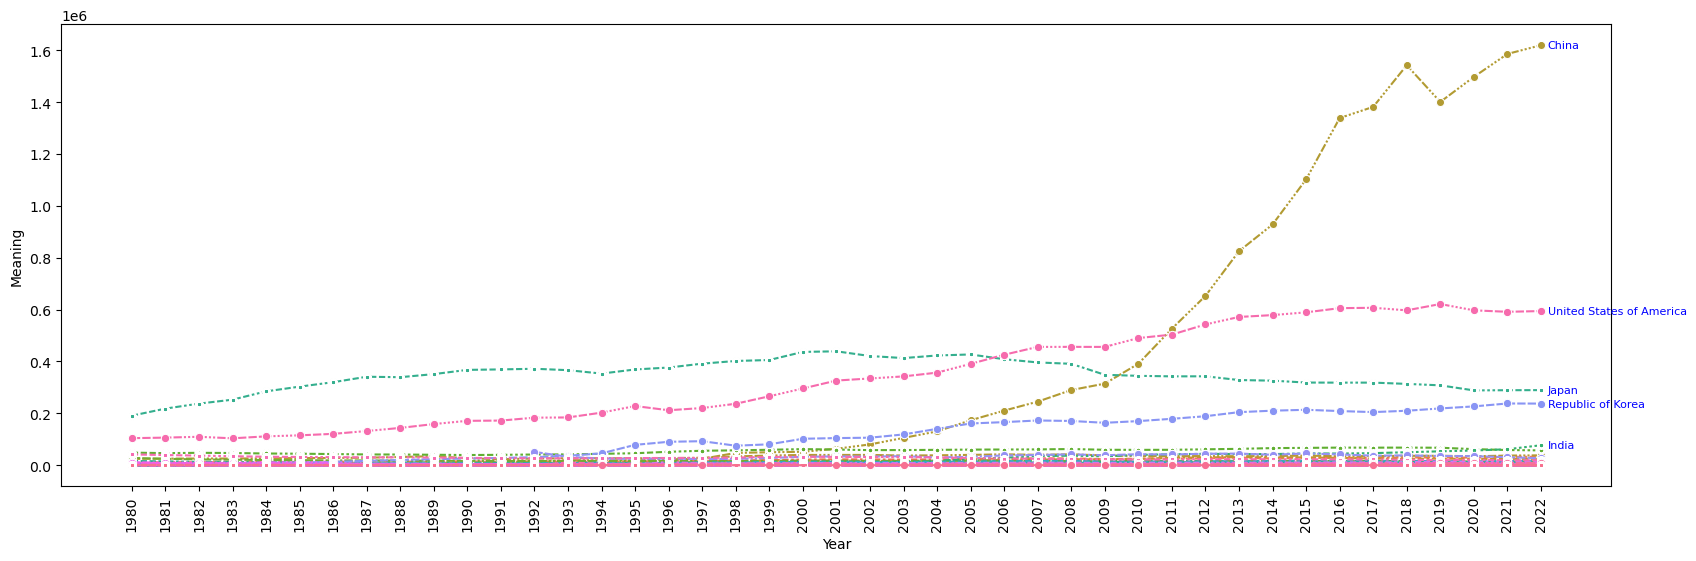

In [355]:
df_combined_transposed = df_combined.transpose()

# Sort the DataFrame based on values in the "2022_patent" column and select the top 5
top_5_countries_2022 = df_combined["2022_patent"].sort_values(ascending=False).head(5).index

# Plotting
plt.figure(figsize=(20, 6))

# Plot the DataFrame using Seaborn's lineplot
sns.lineplot(data=df_combined_transposed[:43], markers=True, legend=False)

# Set custom x-axis tick labels from 1980 to 2022
years = list(range(1980, 2023))
plt.xticks(range(len(years)), years, rotation=90)

# Show the plot

# Adding legend for the top 5 countries in 2022 with a little shift to the right
for country in top_5_countries_2022:
    plt.text(len(years) - 1 + 0.2, df_combined.loc[country, "2022_patent"], country, ha='left', va='center', fontsize=8, color='blue')

plt.xlabel('Year')
plt.ylabel('Meaning')
plt.show()

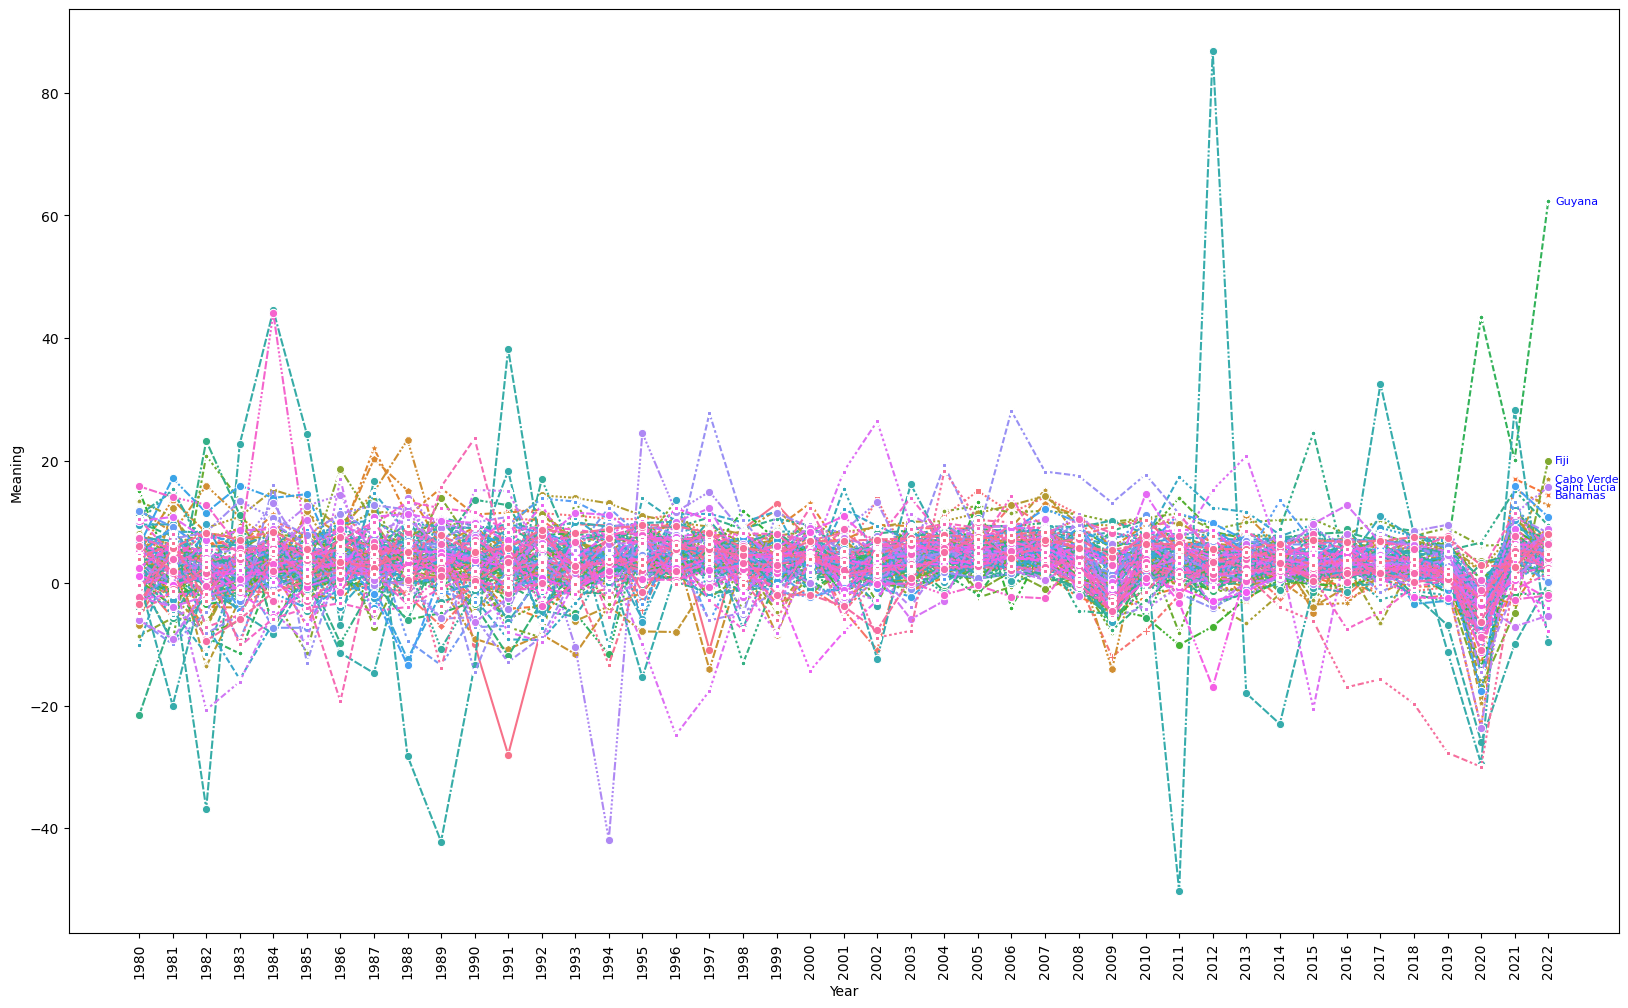

In [362]:
df_combined["2022_GDP"] = pd.to_numeric(df_combined["2022_GDP"], errors='coerce')

# Sort the DataFrame based on numeric values in the "2022_GDP" column and select the top 5
top_5_countries_2022 = df_combined["2022_GDP"].sort_values(ascending=False).head(5).index

# Plotting
plt.figure(figsize=(20, 12))

# Plot the DataFrame using Seaborn's lineplot
sns.lineplot(data=df_combined_transposed[43:], markers=True, legend=False)

# Set custom x-axis tick labels from 1980 to 2022
years = list(range(1980, 2023))
plt.xticks(range(len(years)), years, rotation=90)

# Show the plot

# Adding legend for the top 5 countries in 2022 with a little shift to the right
for country in top_5_countries_2022:
    plt.text(len(years) - 1 + 0.2, df_combined.loc[country, "2022_GDP"], country, ha='left', va='center', fontsize=8, color='blue')

plt.xlabel('Year')
plt.ylabel('Meaning')
plt.show()